In [15]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

Machine Amrta

In [16]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [17]:
filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv'

In [18]:
# Chargement des données csv
data= pd.read_csv(filename,sep=";",index_col=0)
data.head()

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


# Construction du Y 

In [24]:
def nb_buts(x,data):
    tab =data.values
    for i in tab:
        if i[10]>x:
            i[24] = 1
        else:
             i[24] = 0
    a = tab[:,24]
    return a.astype(int)

## MODELE 1 :Y pour buts >0,5

In [25]:
a=nb_buts(0.5,data)
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,1
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,1
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,1
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,1
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2019-05-18,Levante,Ath Madrid,0.0,0,2.0,2.0,2.0,0.0,2.0,...,1.678414,0.437086,0.678414,1.140969,0.660793,0.471366,0.229075,5198,10169,1
376,2019-05-18,Sevilla,Ath Bilbao,1.0,0,2.0,0.0,1.0,0.0,1.0,...,1.268722,0.651982,0.590308,1.312775,1.162996,0.603524,0.519824,9335,6881,1
377,2019-05-18,Valladolid,Valencia,2.0,0,0.0,2.0,0.0,1.0,1.0,...,1.506608,0.297297,0.722467,0.215859,1.246696,0.088106,0.533040,4109,12990,1
378,2019-05-19,Eibar,Barcelona,0.0,1,2.0,2.0,2.0,2.0,4.0,...,2.823789,0.572687,1.074890,1.392070,0.823789,0.629956,0.361233,4455,15917,1


In [26]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1424,2020-07-01,FINISHED,279508,ACF Fiorentina,US Sassuolo Calcio,99,471,2679,3086,1.214286,1.714286,1.392857,1.750000
1085,2020-07-01,FINISHED,273889,Real Betis Balompié,Villarreal CF,90,94,8949,5396,1.343750,1.593750,1.625000,1.250000
1423,2020-07-01,FINISHED,279512,Bologna FC 1909,Cagliari Calcio,103,104,3818,2866,1.428571,1.678571,1.607143,1.571429
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,1.607143,1.071429,1.035714,1.250000
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0.857143,0.821429,1.571429,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,2.000000,1.566667,1.166667,1.000000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.966667,1.633333,1.200000,1.066667
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [27]:
y = data_x.buts_class
np.unique(y)

array([0, 1], dtype=int64)

In [28]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9238, 6) (9238,)
2


array([1, 1, 1, ..., 1, 1, 1])

In [38]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [39]:
model_zero_cinq = create_model()
print(model_zero_cinq.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               3584      
_________________________________________________________________
dense_49 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_50 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_51 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_52 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_53 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_54 (Dense)             (None, 128)              

In [40]:
save_zero_cinq = ModelCheckpoint('model_buts_0,5.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [41]:
history = model_zero_cinq.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=50,
                    callbacks = [save_zero_cinq])

Train on 9238 samples, validate on 2310 samples
Epoch 1/50
9000/9238 [============================>.] - ETA: 0s - loss: 9.3478 - accuracy: 0.8692
Epoch 00001: val_accuracy improved from -inf to 0.53680, saving model to model_buts_0,5.h5
9238/9238 [==============================] - 2s 200us/sample - loss: 9.1273 - accuracy: 0.8697 - val_loss: 1.1939 - val_accuracy: 0.5368
Epoch 2/50
8730/9238 [===========================>..] - ETA: 0s - loss: 0.4679 - accuracy: 0.9171
Epoch 00002: val_accuracy improved from 0.53680 to 0.93333, saving model to model_buts_0,5.h5
9238/9238 [==============================] - 1s 115us/sample - loss: 0.4593 - accuracy: 0.9175 - val_loss: 0.2667 - val_accuracy: 0.9333
Epoch 3/50
9180/9238 [============================>.] - ETA: 0s - loss: 0.2961 - accuracy: 0.9228
Epoch 00003: val_accuracy did not improve from 0.93333
9238/9238 [==============================] - 1s 112us/sample - loss: 0.2955 - accuracy: 0.9230 - val_loss: 0.2523 - val_accuracy: 0.9333
Epoch 4

Epoch 29/50
9180/9238 [============================>.] - ETA: 0s - loss: 0.2702 - accuracy: 0.9235
Epoch 00029: val_accuracy did not improve from 0.93333
9238/9238 [==============================] - 1s 106us/sample - loss: 0.2711 - accuracy: 0.9231 - val_loss: 0.2492 - val_accuracy: 0.9333
Epoch 30/50
9000/9238 [============================>.] - ETA: 0s - loss: 0.2716 - accuracy: 0.9229
Epoch 00030: val_accuracy did not improve from 0.93333
9238/9238 [==============================] - 1s 107us/sample - loss: 0.2711 - accuracy: 0.9231 - val_loss: 0.2467 - val_accuracy: 0.9333
Epoch 31/50
8640/9238 [===========================>..] - ETA: 0s - loss: 0.2745 - accuracy: 0.9215
Epoch 00031: val_accuracy did not improve from 0.93333
9238/9238 [==============================] - 1s 109us/sample - loss: 0.2704 - accuracy: 0.9231 - val_loss: 0.2492 - val_accuracy: 0.9333
Epoch 32/50
9180/9238 [============================>.] - ETA: 0s - loss: 0.2707 - accuracy: 0.9231
Epoch 00032: val_accuracy di

Text(0, 0.5, 'Accuracy')

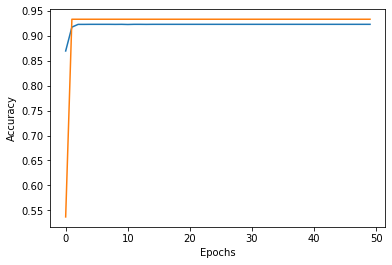

In [42]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prediction y > 0.5

In [46]:
unique = x_prediction.values
results = []
superieurzero =[]
inferieurzero = []
i = 0
predictions_final = model_zero_cinq.predict(np.array([x_train[1]]))
predictions_final

array([[0.06461713, 0.93538284]], dtype=float32)

In [47]:
model_zero_cinq.load_weights("model_buts_0,5.h5")

In [48]:
for i in unique:
    predictions_final = model_zero_cinq.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    pred0 =round(predictions_final[0][0],2)
    superieurzero.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    inferieurzero.append(pred1)
    print(result,predictions_final)

1 [[0.12049799 0.87950206]]
1 [[0.03507839 0.96492165]]
1 [[0.12458486 0.87541515]]
1 [[0.06171233 0.9382877 ]]
1 [[0.15947169 0.8405283 ]]
1 [[0.00907751 0.9909225 ]]
1 [[0.06483425 0.93516576]]
1 [[0.09313019 0.90686977]]
1 [[0.06534221 0.9346578 ]]
1 [[0.02803168 0.97196835]]
1 [[0.0515644  0.94843566]]
1 [[0.10880574 0.89119434]]
1 [[0.04152651 0.9584735 ]]
1 [[0.03108712 0.96891284]]
1 [[0.03365776 0.9663422 ]]
1 [[0.00452538 0.99547464]]
1 [[0.0529713 0.9470287]]
1 [[0.10473713 0.8952629 ]]
1 [[0.02061755 0.9793825 ]]
1 [[0.09684545 0.90315455]]
1 [[0.09623876 0.90376127]]
1 [[0.04127633 0.9587237 ]]
1 [[0.05805022 0.9419498 ]]
1 [[0.14834289 0.8516571 ]]
1 [[0.02956817 0.97043186]]
1 [[0.10006846 0.8999315 ]]
1 [[0.02367088 0.9763291 ]]
1 [[0.02241288 0.97758716]]
1 [[0.04477969 0.9552203 ]]
1 [[0.12479798 0.875202  ]]
1 [[0.01494261 0.9850574 ]]
1 [[0.11909887 0.8809011 ]]
1 [[0.05879043 0.9412095 ]]
1 [[0.03597341 0.96402663]]
1 [[0.01546202 0.98453796]]
1 [[0.14870542 0.85129

## MODELE 2 :Y pour buts > 1,5

In [49]:
a=nb_buts(1.5,data)
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,1
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,1
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,0
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,1
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2019-05-18,Levante,Ath Madrid,0.0,0,2.0,2.0,2.0,0.0,2.0,...,1.678414,0.437086,0.678414,1.140969,0.660793,0.471366,0.229075,5198,10169,1
376,2019-05-18,Sevilla,Ath Bilbao,1.0,0,2.0,0.0,1.0,0.0,1.0,...,1.268722,0.651982,0.590308,1.312775,1.162996,0.603524,0.519824,9335,6881,1
377,2019-05-18,Valladolid,Valencia,2.0,0,0.0,2.0,0.0,1.0,1.0,...,1.506608,0.297297,0.722467,0.215859,1.246696,0.088106,0.533040,4109,12990,1
378,2019-05-19,Eibar,Barcelona,0.0,1,2.0,2.0,2.0,2.0,4.0,...,2.823789,0.572687,1.074890,1.392070,0.823789,0.629956,0.361233,4455,15917,1


In [50]:
y = data_x.buts_class
np.unique(y)

array([0, 1], dtype=int64)

In [51]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1424,2020-07-01,FINISHED,279508,ACF Fiorentina,US Sassuolo Calcio,99,471,2679,3086,1.214286,1.714286,1.392857,1.750000
1085,2020-07-01,FINISHED,273889,Real Betis Balompié,Villarreal CF,90,94,8949,5396,1.343750,1.593750,1.625000,1.250000
1423,2020-07-01,FINISHED,279512,Bologna FC 1909,Cagliari Calcio,103,104,3818,2866,1.428571,1.678571,1.607143,1.571429
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,1.607143,1.071429,1.035714,1.250000
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0.857143,0.821429,1.571429,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,2.000000,1.566667,1.166667,1.000000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.966667,1.633333,1.200000,1.066667
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [52]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9238, 6) (9238,)
2


array([1, 1, 1, ..., 1, 1, 0])

In [53]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [54]:
model_un_cinq = create_model()
print(model_un_cinq.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 512)               3584      
_________________________________________________________________
dense_65 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_66 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_67 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_68 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_69 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_70 (Dense)             (None, 128)              

In [55]:
save_un_cinq = ModelCheckpoint('model_buts_1,5.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [56]:
history = model_un_cinq.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=50,
                    callbacks = [save_un_cinq])

Train on 9238 samples, validate on 2310 samples
Epoch 1/50
9090/9238 [============================>.] - ETA: 0s - loss: 7.8105 - accuracy: 0.6513
Epoch 00001: val_accuracy improved from -inf to 0.70346, saving model to model_buts_1,5.h5
9238/9238 [==============================] - 2s 201us/sample - loss: 7.6965 - accuracy: 0.6510 - val_loss: 0.6067 - val_accuracy: 0.7035
Epoch 2/50
9000/9238 [============================>.] - ETA: 0s - loss: 0.6145 - accuracy: 0.7299
Epoch 00002: val_accuracy did not improve from 0.70346
9238/9238 [==============================] - 1s 123us/sample - loss: 0.6148 - accuracy: 0.7293 - val_loss: 0.7019 - val_accuracy: 0.5905
Epoch 3/50
9000/9238 [============================>.] - ETA: 0s - loss: 0.6119 - accuracy: 0.7257
Epoch 00003: val_accuracy did not improve from 0.70346
9238/9238 [==============================] - 1s 110us/sample - loss: 0.6125 - accuracy: 0.7258 - val_loss: 0.6159 - val_accuracy: 0.6853
Epoch 4/50
9000/9238 [========================

Epoch 29/50
8820/9238 [===========================>..] - ETA: 0s - loss: 0.5674 - accuracy: 0.7430
Epoch 00029: val_accuracy did not improve from 0.74719
9238/9238 [==============================] - 1s 99us/sample - loss: 0.5686 - accuracy: 0.7416 - val_loss: 0.5602 - val_accuracy: 0.7472
Epoch 30/50
8820/9238 [===========================>..] - ETA: 0s - loss: 0.5682 - accuracy: 0.7421
Epoch 00030: val_accuracy did not improve from 0.74719
9238/9238 [==============================] - 1s 107us/sample - loss: 0.5693 - accuracy: 0.7416 - val_loss: 0.5635 - val_accuracy: 0.7472
Epoch 31/50
9180/9238 [============================>.] - ETA: 0s - loss: 0.5681 - accuracy: 0.7422
Epoch 00031: val_accuracy did not improve from 0.74719
9238/9238 [==============================] - 1s 112us/sample - loss: 0.5687 - accuracy: 0.7416 - val_loss: 0.5598 - val_accuracy: 0.7472
Epoch 32/50
8730/9238 [===========================>..] - ETA: 0s - loss: 0.5708 - accuracy: 0.7407
Epoch 00032: val_accuracy did

Text(0, 0.5, 'Accuracy')

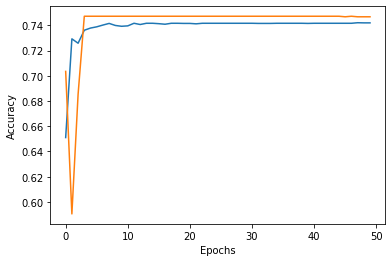

In [57]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prediction y > 1.5

In [58]:
unique = x_prediction.values
results = []
superieurun =[]
inferieurun = []
i = 0
predictions_final = model_un_cinq.predict(np.array([x_train[1]]))
predictions_final

array([[0.25471586, 0.74528414]], dtype=float32)

In [59]:
model_un_cinq.load_weights("model_buts_1,5.h5")

In [60]:
for i in unique:
    predictions_final = model_un_cinq.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    pred0 =round(predictions_final[0][0],2)
    superieurzero.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    inferieurzero.append(pred1)
    print(result,predictions_final)

1 [[0.24648534 0.7535147 ]]
1 [[0.05101135 0.9489887 ]]
1 [[0.16210222 0.8378978 ]]
1 [[0.08653722 0.91346276]]
1 [[0.27428502 0.725715  ]]
1 [[0.03390943 0.96609056]]
1 [[0.1699285 0.8300715]]
1 [[0.2559472  0.74405277]]
1 [[0.22694176 0.77305824]]
1 [[0.03741776 0.9625823 ]]
1 [[0.07757656 0.9224234 ]]
1 [[0.16504991 0.8349501 ]]
1 [[0.07161323 0.9283868 ]]
1 [[0.07101082 0.9289892 ]]
1 [[0.05615476 0.9438453 ]]
1 [[0.11534909 0.8846509 ]]
1 [[0.21442793 0.78557205]]
1 [[0.17904045 0.8209596 ]]
1 [[0.02710052 0.9728995 ]]
1 [[0.1413855 0.8586145]]
1 [[0.12617858 0.87382144]]
1 [[0.06392886 0.93607116]]
1 [[0.08142821 0.91857177]]
1 [[0.2568378  0.74316216]]
1 [[0.18108319 0.8189168 ]]
1 [[0.16050866 0.83949137]]
1 [[0.17303641 0.8269636 ]]
1 [[0.03148592 0.968514  ]]
1 [[0.12379157 0.8762085 ]]
1 [[0.28008285 0.7199172 ]]
1 [[0.03371505 0.966285  ]]
1 [[0.18620321 0.8137968 ]]
1 [[0.08080547 0.9191945 ]]
1 [[0.05322858 0.94677144]]
1 [[0.03648244 0.9635175 ]]
1 [[0.2565313 0.7434687]

## MODELE 3 :Y pour buts > 2,5

In [71]:
a=nb_buts(2.5,data)
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,1
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,0
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,0
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,1
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2019-05-18,Levante,Ath Madrid,0.0,0,2.0,2.0,2.0,0.0,2.0,...,1.678414,0.437086,0.678414,1.140969,0.660793,0.471366,0.229075,5198,10169,1
376,2019-05-18,Sevilla,Ath Bilbao,1.0,0,2.0,0.0,1.0,0.0,1.0,...,1.268722,0.651982,0.590308,1.312775,1.162996,0.603524,0.519824,9335,6881,0
377,2019-05-18,Valladolid,Valencia,2.0,0,0.0,2.0,0.0,1.0,1.0,...,1.506608,0.297297,0.722467,0.215859,1.246696,0.088106,0.533040,4109,12990,0
378,2019-05-19,Eibar,Barcelona,0.0,1,2.0,2.0,2.0,2.0,4.0,...,2.823789,0.572687,1.074890,1.392070,0.823789,0.629956,0.361233,4455,15917,1


In [72]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1424,2020-07-01,FINISHED,279508,ACF Fiorentina,US Sassuolo Calcio,99,471,2679,3086,1.214286,1.714286,1.392857,1.750000
1085,2020-07-01,FINISHED,273889,Real Betis Balompié,Villarreal CF,90,94,8949,5396,1.343750,1.593750,1.625000,1.250000
1423,2020-07-01,FINISHED,279512,Bologna FC 1909,Cagliari Calcio,103,104,3818,2866,1.428571,1.678571,1.607143,1.571429
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,1.607143,1.071429,1.035714,1.250000
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0.857143,0.821429,1.571429,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,2.000000,1.566667,1.166667,1.000000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.966667,1.633333,1.200000,1.066667
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [73]:
y = data_x.buts_class
np.unique(y)

array([0, 1], dtype=int64)

In [74]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9238, 6) (9238,)
2


array([0, 1, 0, ..., 1, 0, 0])

In [75]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [76]:
# def create_model2():
    
#     model = Sequential()
    
#     model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
#     model.add(Dense(256, input_dim=x_train.shape[1], activation='linear'))
#     model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    
#     model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
#     model.add(Dense(256, input_dim=x_train.shape[1], activation='linear'))
#     model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
    
#     model.add(BatchNormalization())
#     model.add(Dropout(0.05))
    
#     model.add(Dense(nbClasses, activation='softmax'))    
#     model.compile(loss="sparse_categorical_crossentropy",
#                   optimizer=Adam(),
#                   metrics=["accuracy"])
#     return model

In [77]:
model_deux_cinq= create_model()
print(model_deux_cinq.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 512)               3584      
_________________________________________________________________
dense_97 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_98 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_99 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_100 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_101 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_102 (Dense)            (None, 128)              

In [78]:
save_deux_cinq = ModelCheckpoint('model_buts_2,5.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [79]:
history = model_deux_cinq.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=50,
                    callbacks = [save_deux_cinq])

Train on 9238 samples, validate on 2310 samples
Epoch 1/50
9000/9238 [============================>.] - ETA: 0s - loss: 7.5512 - accuracy: 0.5063
Epoch 00001: val_accuracy improved from -inf to 0.53853, saving model to model_buts_2,5.h5
9238/9238 [==============================] - 2s 221us/sample - loss: 7.3750 - accuracy: 0.5081 - val_loss: 0.7709 - val_accuracy: 0.5385
Epoch 2/50
9090/9238 [============================>.] - ETA: 0s - loss: 0.7403 - accuracy: 0.5212
Epoch 00002: val_accuracy did not improve from 0.53853
9238/9238 [==============================] - 1s 116us/sample - loss: 0.7393 - accuracy: 0.5219 - val_loss: 0.7099 - val_accuracy: 0.5225
Epoch 3/50
9000/9238 [============================>.] - ETA: 0s - loss: 0.7128 - accuracy: 0.5251
Epoch 00003: val_accuracy improved from 0.53853 to 0.53939, saving model to model_buts_2,5.h5
9238/9238 [==============================] - 1s 129us/sample - loss: 0.7123 - accuracy: 0.5253 - val_loss: 0.7012 - val_accuracy: 0.5394
Epoch 4

Epoch 28/50
9000/9238 [============================>.] - ETA: 0s - loss: 0.6899 - accuracy: 0.5432
Epoch 00028: val_accuracy did not improve from 0.55714
9238/9238 [==============================] - 1s 122us/sample - loss: 0.6898 - accuracy: 0.5437 - val_loss: 0.6857 - val_accuracy: 0.5537
Epoch 29/50
8820/9238 [===========================>..] - ETA: 0s - loss: 0.6891 - accuracy: 0.5399
Epoch 00029: val_accuracy did not improve from 0.55714
9238/9238 [==============================] - 1s 113us/sample - loss: 0.6889 - accuracy: 0.5405 - val_loss: 0.6843 - val_accuracy: 0.5468
Epoch 30/50
8910/9238 [===========================>..] - ETA: 0s - loss: 0.6870 - accuracy: 0.5504
Epoch 00030: val_accuracy did not improve from 0.55714
9238/9238 [==============================] - 1s 114us/sample - loss: 0.6872 - accuracy: 0.5509 - val_loss: 0.6859 - val_accuracy: 0.5502
Epoch 31/50
9090/9238 [============================>.] - ETA: 0s - loss: 0.6869 - accuracy: 0.5446 ETA: 0s - loss: 0.6886 - ac


Text(0, 0.5, 'Accuracy')

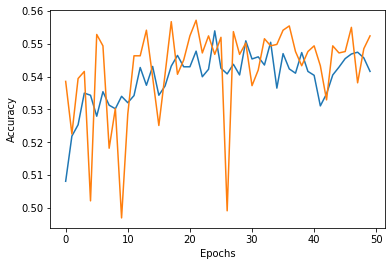

In [80]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction

In [93]:
unique = x_prediction.values
results = []
superieur2 =[]
inferieur2 = []
i = 0
predictions_final = model_deux_cinq.predict(np.array([x_train[1]]))
predictions_final.shape

(1, 2)

In [82]:
model_deux_cinq.load_weights("model_buts_2,5.h5")

In [95]:
for i in unique:
    predictions_final = model.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    pred0 =round(predictions_final[0][0],2)
    superieur2.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    inferieur2.append(pred1)

    print(result,predictions_final)

0 [[9.9998617e-01 1.3783083e-05]]
0 [[1.00000e+00 3.30237e-09]]
0 [[9.9995744e-01 4.2578507e-05]]
1 [[0.03836465 0.9616354 ]]
0 [[0.99816364 0.00183638]]
1 [[2.2414778e-04 9.9977583e-01]]
0 [[1.000000e+00 2.127227e-20]]
0 [[9.9999952e-01 4.3342175e-07]]
0 [[1.0000000e+00 9.0623935e-09]]
1 [[0.00513291 0.9948671 ]]
0 [[1.0000000e+00 2.3136665e-10]]
0 [[9.9999046e-01 9.5295200e-06]]
0 [[1.0000000e+00 2.1170476e-12]]
0 [[9.9990976e-01 9.0178597e-05]]
0 [[1.0000000e+00 3.5430402e-13]]
0 [[1.000000e+00 7.433441e-23]]
0 [[1.0000000e+00 6.1904285e-14]]
0 [[0.9971329  0.00286705]]
1 [[0.00628496 0.9937151 ]]
1 [[0.4515516  0.54844844]]
0 [[9.9999905e-01 9.4939833e-07]]
0 [[0.6809188 0.3190812]]
1 [[0.01536193 0.98463804]]
0 [[1.0000000e+00 1.0464887e-08]]
0 [[1.0000000e+00 1.9409449e-20]]
0 [[9.999989e-01 1.116815e-06]]
0 [[1.0000000e+00 3.1769034e-22]]
1 [[0.10993606 0.89006394]]
0 [[1.000000e+00 2.378662e-13]]
0 [[9.9984860e-01 1.5143101e-04]]
0 [[9.9903715e-01 9.6282695e-04]]
0 [[0.99795204

0 [[1.0000000e+00 1.2035926e-14]]
0 [[1.0000000e+00 1.4127118e-10]]
0 [[9.996588e-01 3.411846e-04]]
0 [[0.98936826 0.01063179]]
0 [[0.9988864  0.00111356]]
0 [[1.000000e+00 1.590994e-08]]
0 [[0.985021   0.01497904]]
0 [[9.9999774e-01 2.2276361e-06]]
0 [[0.9854102  0.01458983]]
1 [[0.02938958 0.9706104 ]]


In [92]:
# df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
#       'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'< 0,5 buts':zero,'< 1,5 buts':un,'< 2,5 buts':deux}
# df = pd.DataFrame(df)
# df

In [84]:
# df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs.csv',index = False)
# df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs.json')

In [85]:
# finished = []
# scheduled = []

In [86]:
# for i in df.values:
#     if i[2] == 'FINISHED':
#         finished.append(i)
#     else:
#         scheduled.append(i)

In [87]:
# column_names = ["date","id_match", "status","id_HomeTeam","id_AwayTeam","homeTeam","AwayTeam","< 0,5 buts","< 1,5 buts","< 2,5 buts"]
# df_fini = pd.DataFrame(finished,columns = column_names)
# df_programme = pd.DataFrame(scheduled,columns = column_names)

In [88]:
# df_fini

In [89]:
# df_programme

In [90]:
# df_fini.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_finished.csv',index=False)
# df_fini.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_finished.json')

In [91]:
# df_programme.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_scheduled.csv',index=False)
# df_programme.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_scheduled.json')